# 1. Loading The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# 2.Load dataset

In [2]:
data=pd.read_excel("dataset.xlsx")
data.head(5)

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,1 Follower
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,Its true that insurance is a services based in...,7 Reviews,6 Followers
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,28 Followers
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to cust...",1 Review,NaN


In [3]:
data.shape

(130, 9)

In [4]:
data.Location.unique()

array(['Bangalore India', 'new delhi india', 'Kochi India',
       'mumbai india', 'Bengaluru/ Bangalore India', 'Chennai India',
       'Dwarka India', 'banglaore india', 'Delhi India',
       'Chandigarh India', 'Bangalore Inida', 'New Delhi, India India',
       'Miamisburg OH India', 'India', 'Bangalore BE', 'noida India',
       'Hyderabad India', 'Rani Bagh India', 'Mumbai India',
       'greater noida India', 'Mumbai, India India', 'Jamshedpur India',
       'New Delhi India', 'Mumbai, Maharashtra, India India',
       'ludhiana India', 'Rohtak India', 'Pune India', 'Gurgaon India',
       'Kolkata India', 'Noida, India India', 'BHOPAL India',
       'Amherst USA', 'Karnataka India', 'chennai India',
       'Bangalore, India India', 'kolkata India', nan, 'Rishikesh India',
       'Noida India', 'Lucknow India', 'bangalore India',
       'Mangalore India', 'Allahabad, India India', 'Kottayam India',
       'Ajmer India', 'gurgaon India', 'thane India', 'Bhadra India',
       'Ahm

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
subject                      130 non-null object
Customer                     128 non-null object
Location                     125 non-null object
Rating                       130 non-null int64
date_time                    130 non-null object
Views                        130 non-null object
complaint                    130 non-null object
Total_reviews_by_customer    128 non-null object
Customer_follower            42 non-null object
dtypes: int64(1), object(8)
memory usage: 9.2+ KB


In [6]:
data.describe()

,Rating
count,130.000000
mean,1.700000
std,1.267666
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [7]:
data['text_length'] = data['subject'].apply(len)
data.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower,text_length
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,1 Follower,8
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,Its true that insurance is a services based in...,7 Reviews,6 Followers,22
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,NaN,38
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,28 Followers,27
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to cust...",1 Review,NaN,48


# EDA

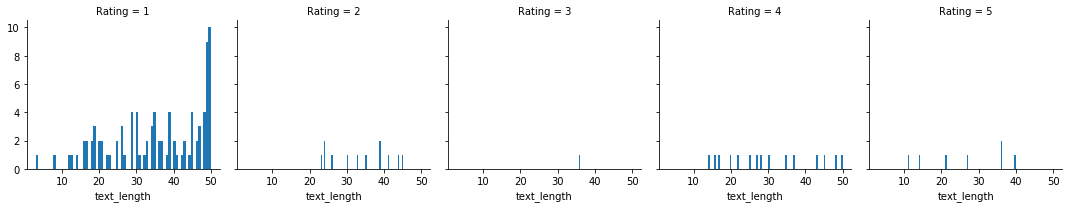

In [8]:
g = sns.FacetGrid(data=data, col='Rating')
g.map(plt.hist, 'text_length', bins=70)

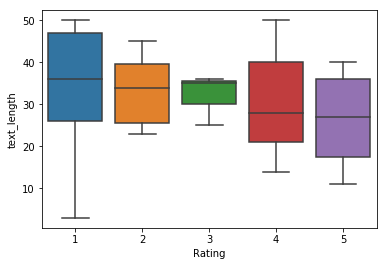

In [9]:
sns.boxplot(x='Rating', y='text_length', data=data)

In [10]:
Rating = data.groupby('Rating').mean()
Rating.corr()

,text_length
text_length,1.0


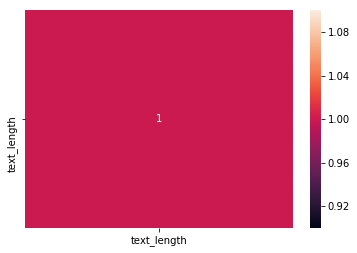

In [11]:
sns.heatmap(data=Rating.corr(), annot=True)

In [12]:
data_class = data[(data['Rating'] == 1) | (data['Rating'] == 5)]
data_class.shape

(100, 10)

In [13]:
X = data_class['complaint']
y = data_class['Rating']

In [14]:
X[0]

"Third class service and they are cheaters. Never ever opt for this. While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they want to communicate with policy owner only and that too with registered mobile number and phone number.\nWhen the policy is surrendered they try to misguide the policy owner by saying that the NAV will increase and cancel the surrendered request and they don't even respond when surrendered the policy second time.\nThere is no benefit of any of the metlife policy and they just want to make profit from customers money. I was paying premium of Rs 25000 and out of which Rs 3000 is deducted every year from profit which is 12% of invested amount.\n\n ...Google PlusEmail Flag this reviewIrrelevantFakeJunk    Report this content as inappropriate on the site:\n\nIf you find this review content irrelevant on our site, report this review! Thank You! We appreciate your effort."

In [17]:
import string
def text_process(complaint):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in complaint if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
import re # for regular expressions
pd.set_option("display.max_colwidth", 200)
import matplotlib.pyplot as plt 
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [20]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


Since there are many reviews, we can expect a lot of zero counts for the presence of a word in the collection. Because of this, Scikit-learn will output a sparse matrix.

Let’s import CountVectorizer and fit an instance to our review text (stored in X), passing in our text_process function as the analyser.

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [22]:
len(bow_transformer.vocabulary_)

3184

In [23]:
review_25 = X[24]

In [24]:
review_25

'The worst insurance policy I have ever seen. They charged 500 rs as a fine for just 1 month delay payment. when I registered a complain regarding the same they told me that the delay payment charges increases everyday. I have never seen any company increses delay payment charges per day. Really dissapointed with the service. while buying the policy I have regestered a ecs facility which is not yet activated.I will suggest not to buy any policy from pnb met life they are the real cheaters in the form of insurance company.\n\n ...Google PlusEmail Flag this reviewIrrelevantFakeJunk    Report this content as inappropriate on the site:\n\nIf you find this review content irrelevant on our site, report this review! Thank You! We appreciate your effort.'

In [25]:
bow_25 = bow_transformer.transform([review_25])
bow_25

<1x3184 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [27]:
print(bow_transformer.get_feature_names()[114])
print(bow_transformer.get_feature_names()[112])

20K
20751099


In [28]:
X = bow_transformer.transform(X)

In [33]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)


Shape of Sparse Matrix:  (100, 3184)
Amount of Non-Zero occurrences:  9588


In [34]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 3.0113065326633164


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
preds = nb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[27  0]
 [ 3  0]]


             precision    recall  f1-score   support

          1       0.90      1.00      0.95        27
          5       0.00      0.00      0.00         3

avg / total       0.81      0.90      0.85        30



C:\Users\Name\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Data Bias
* Although our model achieved quite a high accuracy, there are some issues with bias caused by the dataset.

* Let’s take some singular reviews, and see what rating our model predicts for each one.

* Predicting a singular positive review

In [40]:
positive_review = data_class['complaint'][12]
positive_review

'Only invest in this company if you have sympathy for crooks and criminals since that money will never come back. I believe they are doing business just\xa0\xa0to acquire public money and then run away.\xa0\xa0My mother invested money for 3 years which was what the agent told her, after which when she wanted to discontinue they would not allow that and kept pursuing her without listening to her.\xa0\xa0Finally they applied thousands of unknown hidden cost and service charges and finally she got back only 20% of the principal amount she had invested.\nAfter that their agent calls her after some time and tells her that if she invests more money then they can help her with the injustice done towards her and get back her principal. For that she has to send a cheque of 15000 to some address and sms the cheque no and the DTDC courier number to him, When we questioned him more because we smelled wrongdoing, the agent disconnected. We believe that this was a method employed by metlife to get s

In [41]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

1

Here’s another negative review. Let’s see if the model predicts this one correctly.

In [44]:
negative_review = data_class['complaint'][20]
negative_review

'We have 2 policies:00110576 & 00111801\nWe had surrendered our policies on 21 Aug 2015 and got the acknowledgement.\nBut the company is not settling the amount(more than Rs 10 lacs).\nThey are behaving like a chit fund company. Never expected this from a Public Sector & Multinational company.\nAlthough I keep telling them repeatedly that the policy is with them, they go no like a broken record "Submit your policy".\nDoes anybody have any suggestion how to get them to settle my account.\nRozario & Kavitha\n\n ...Google PlusEmail Flag this reviewIrrelevantFakeJunk    Report this content as inappropriate on the site:\n\nIf you find this review content irrelevant on our site, report this review! Thank You! We appreciate your effort.'

In [45]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

In [46]:
another_negative_review = data_class['complaint'][30]
another_negative_review

"My policy no is 20150315 and I have taken Met Little Star.\nIt has been 6 years and 9 month since I have been paying Rs 3000/ per month and after a recent visit of one of your relationship manager, I came to know that my fund is not moving at all. I also came to know that that time due to the mere fulfillment and increasing the no of sold policy, this policy was sold to me by the agent.\nFrom last 81 months I have been paying Rs 3000/ per month and the total principal amount is\n81 months x 3000= Rs 2, 43, 000/\nAnd my current Fund value is showing only Rs 2, 56, 000/? This means I have gained only Rs 13, 000/ as increment after 7 years?\nIs this what I have been paying for in a mutual fund?\nIf I had invested this money in some other plan, the amount I would have got the twice at least.\nMy points are:-\n1) Just to increase the number of selling they have sold me this dead policy.\n2) Their appointed agents( Manju Pillai and her husband Sheshadhri-+91-9810860247) knew all about this,

In [47]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

1

* Our model thinks this review is negative.

* Why the incorrect prediction?
One explanation as to why this may be the case is that our initial dataset had a much higher number of 5-rating  reviews than 1-Rating  reviews. This means that the model is more biased towards positive reviews compared to negative ones.

* In conclusion, although our model was a little biased towards positive reviews, it was fairly accurate with its predictions,   achieving an accuracy of 85% on the test set.

# The END

# Complexity of the analysis.

IT's is the complexity i dont have time to analysis every things

# Extent of various methods and algorithms used.

I use the naive_bayes algoritham 

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[27  0]
 [ 3  0]]


             precision    recall  f1-score   support

          1       0.90      1.00      0.95        27
          5       0.00      0.00      0.00         3

avg / total       0.81      0.90      0.85        30



C:\Users\Name\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


i use NLP techniques to mine patterns from text.